In [1]:
import os

import torch

from data.normalization import normalize_data, denormalize_data
from base_model import Model

# Load datasets

In [2]:
train_dataset_path = "./data/main_dataset/base/"

dataset_names = [
    "bc_ood_bottom", "bc_ood_left",
    "ncells_ood_41", "ncells_ood_31",
    "re_ood_high", "re_ood_low"
    ]

datasets = {}
for dataset_name in dataset_names:
    inputs = torch.load(
        os.path.join("./data/ood_dataset", dataset_name, "inputs.pt")
        )
    outputs = torch.load(
        os.path.join("./data/ood_dataset", dataset_name, "outputs.pt")
        )
    # normalize datapoints based on the ranges of the training dataset
    # inputs, outputs = normalize_data(
    #     inputs, outputs, os.path.join(train_dataset_path, "min_max.yaml")
    #     )
    
    datasets[dataset_name] = {"inputs": inputs, "outputs": outputs}

# include the training dataset in the datasets dictionary
datasets["main"] = {
    "inputs": torch.load(os.path.join(train_dataset_path, "inputs.pt")),
    "outputs": torch.load(os.path.join(train_dataset_path, "outputs.pt"))
    }


# Inspect OOD data samples

In [3]:
from plotting import plot_data_samples

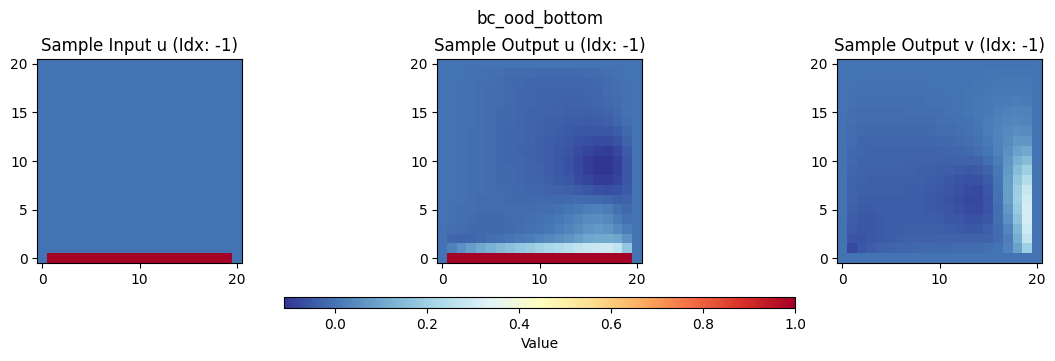

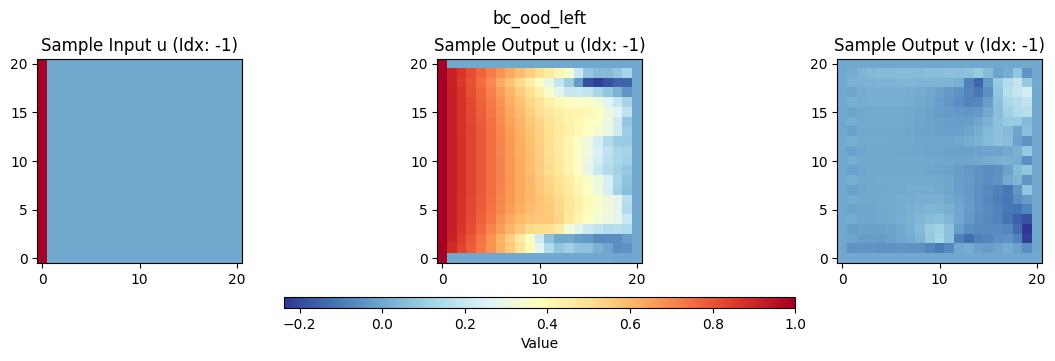

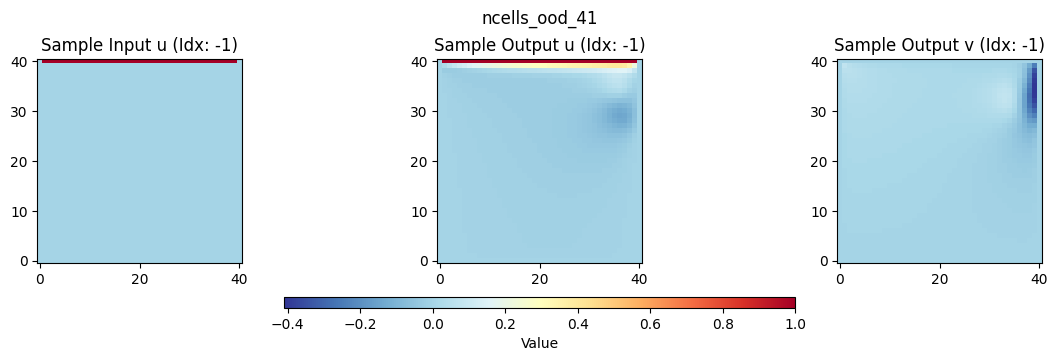

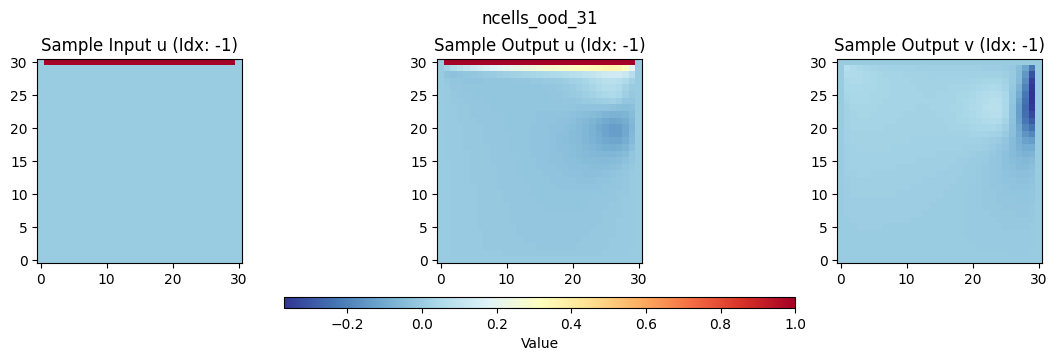

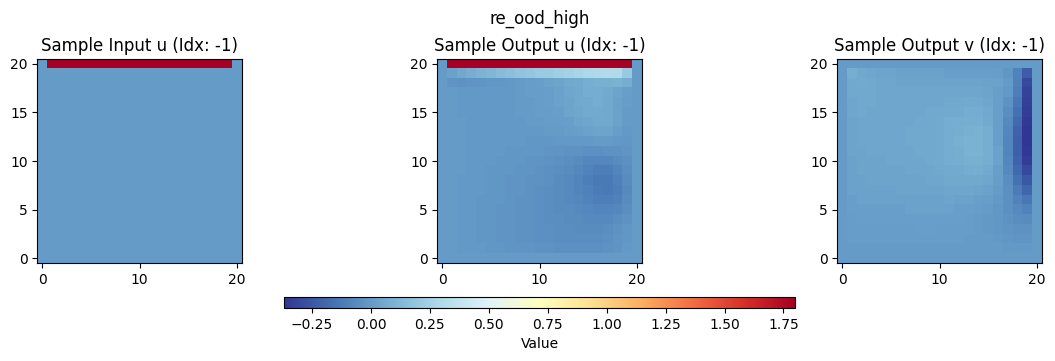

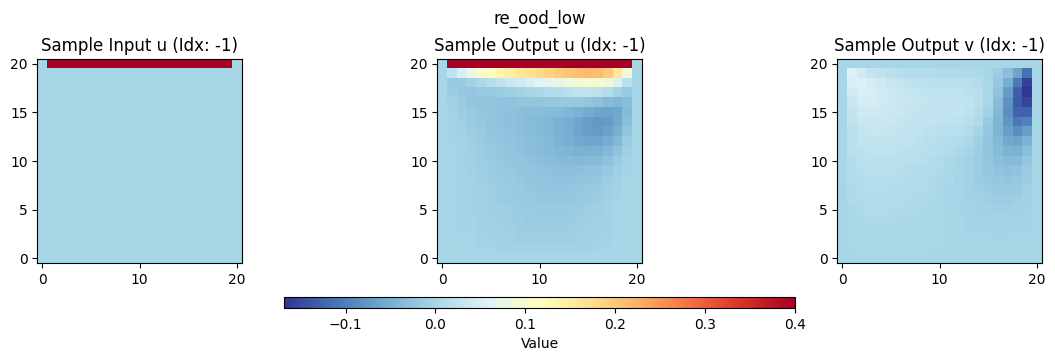

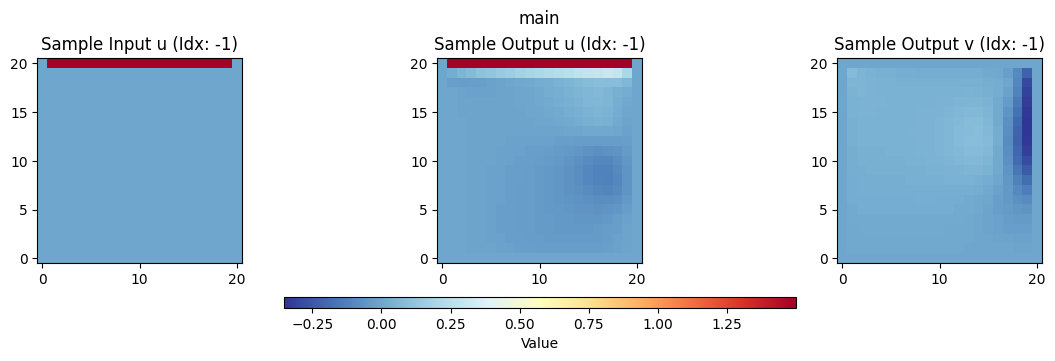

In [4]:
for dataset_name in datasets.keys():
    plot_data_samples(
        datasets[dataset_name]["inputs"],
        datasets[dataset_name]["outputs"],
        dataset_name,
        -1,
    )

# OOD Visual Sample Evaluation

Load model

In [5]:
model = Model()
model.load_model(path="./models/", name="base_model")

For every dataset point, evaluate the model

In [6]:
for dataset_name in datasets:
    inputs = datasets[dataset_name]["inputs"]
    outputs = datasets[dataset_name]["outputs"]

    # predictions tensor with same shape as outputs
    predictions = torch.zeros(outputs.shape)

    # call the model
    predictions = model.inference(inputs.float(), os.path.join(train_dataset_path, "min_max.yaml")).detach()

    datasets[dataset_name]["predictions"] = predictions
        

## OOD Reynolds number and boundary conditions 

### Higher reynolds number

- does this mean the results are overfitted?

--------------------------------------------------


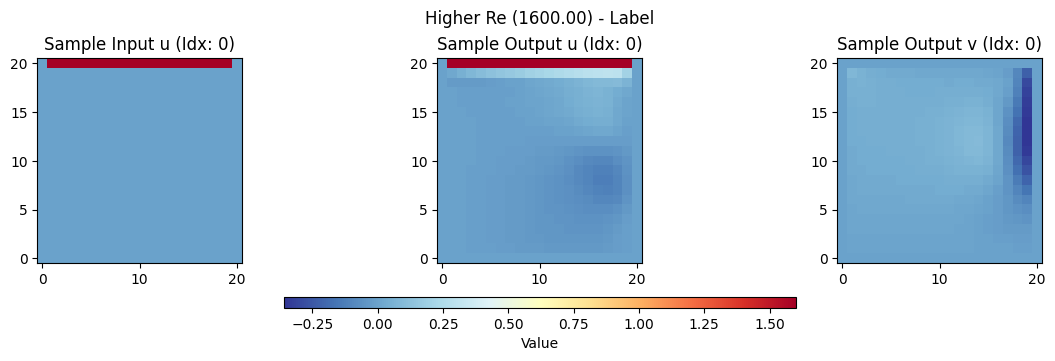

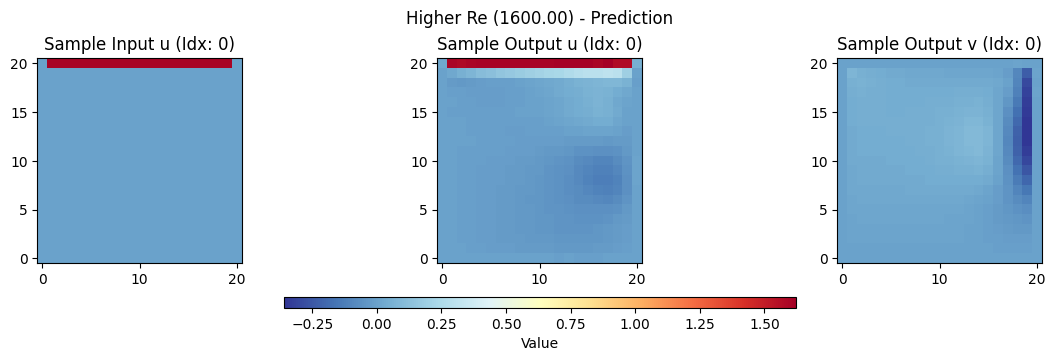

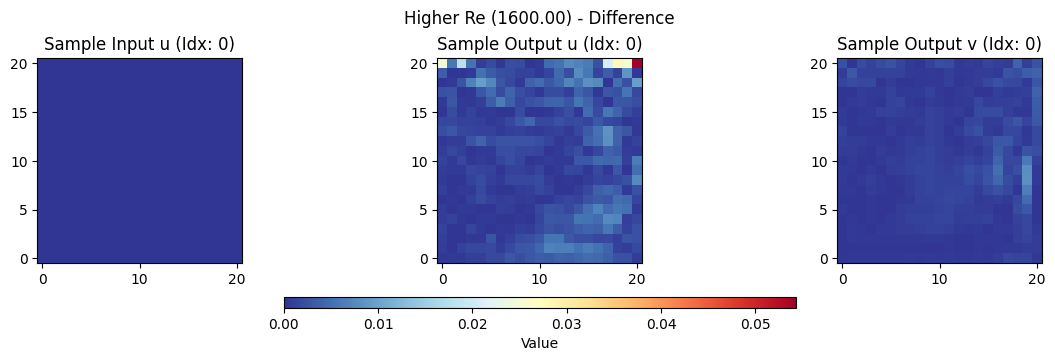

--------------------------------------------------


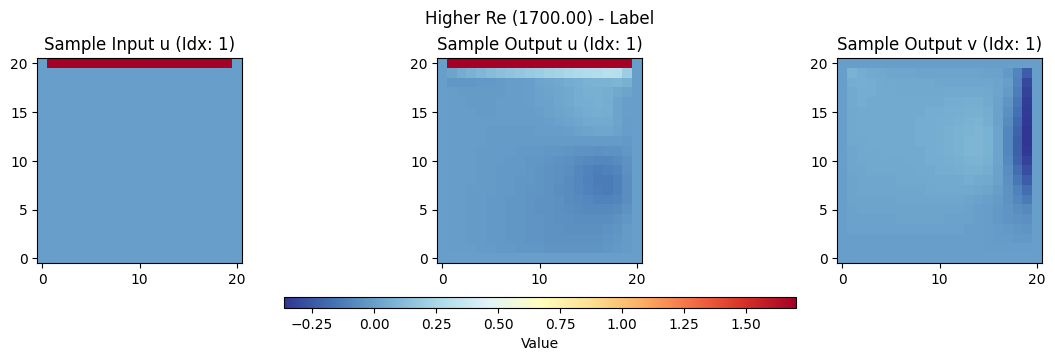

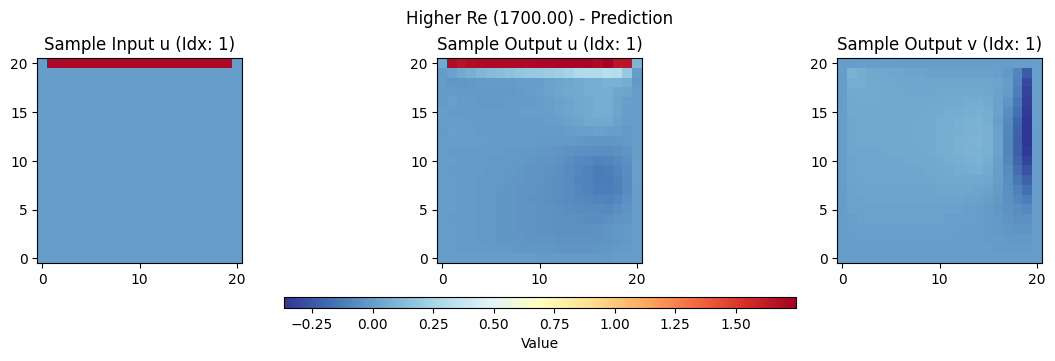

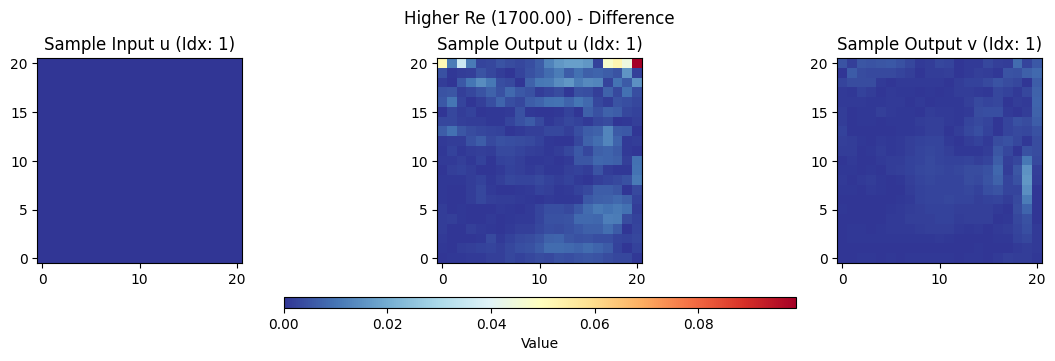

--------------------------------------------------


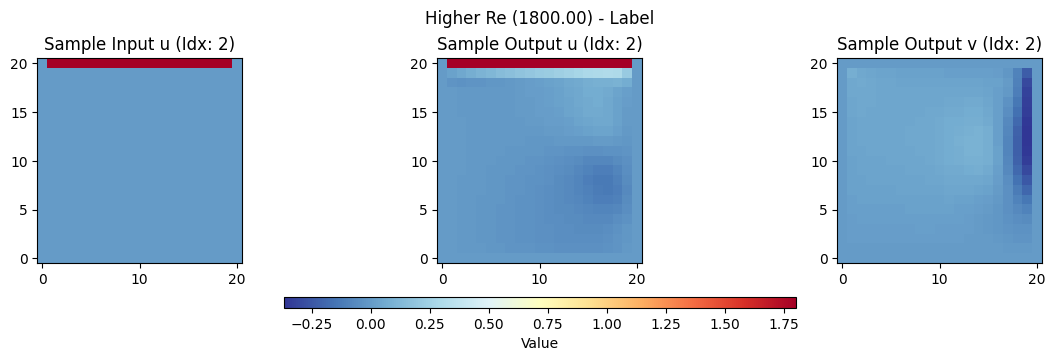

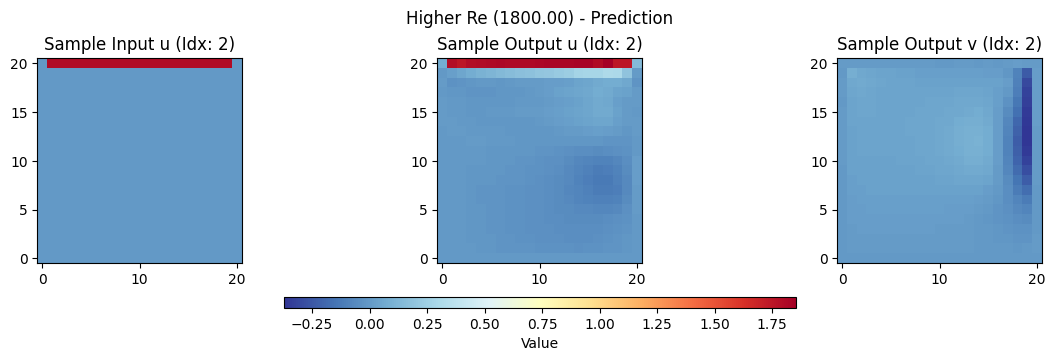

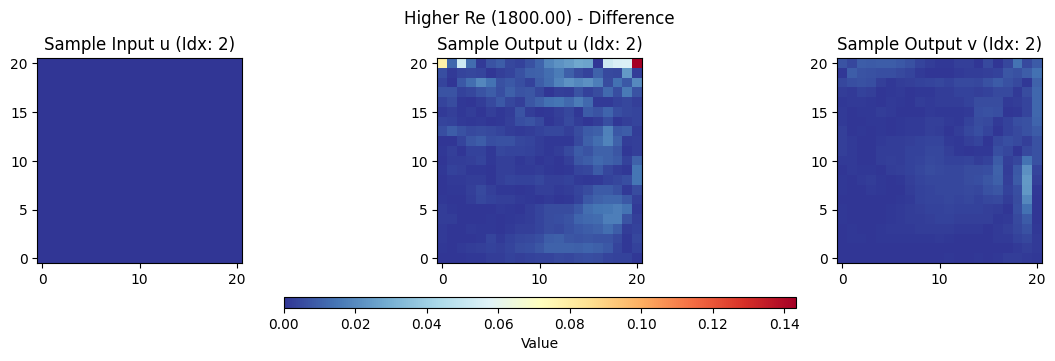

In [14]:
inputs, outputs, predictions = datasets["re_ood_high"].values()

for i in range(outputs.shape[0]):
    print("-" * 50)
    re = inputs[i].max() * 1000
    plot_data_samples(inputs, outputs, f"Higher Re ({re:.2f}) - Label", i)
    plot_data_samples(inputs, predictions, f"Higher Re ({re:.2f}) - Prediction", i)
    plot_data_samples(inputs - inputs, torch.abs(outputs - predictions), f"Higher Re ({re:.2f}) - Difference", i)

### Lower reynolds number

--------------------------------------------------


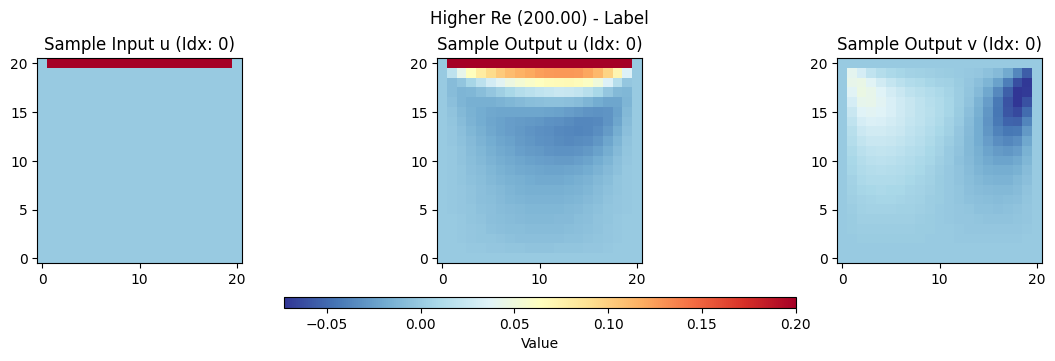

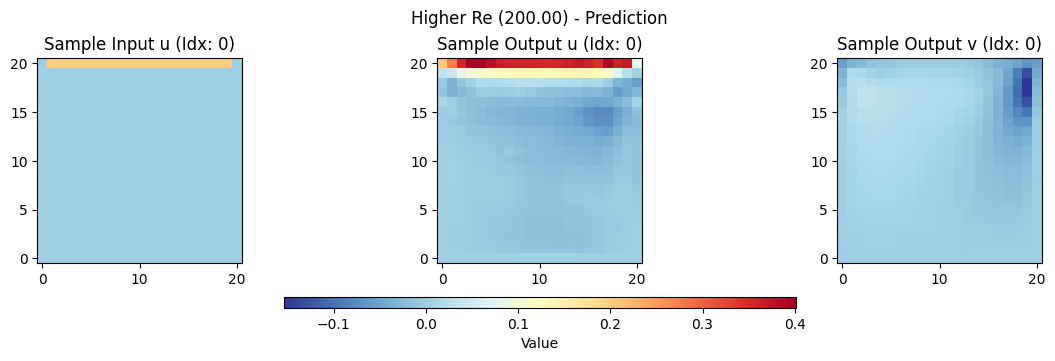

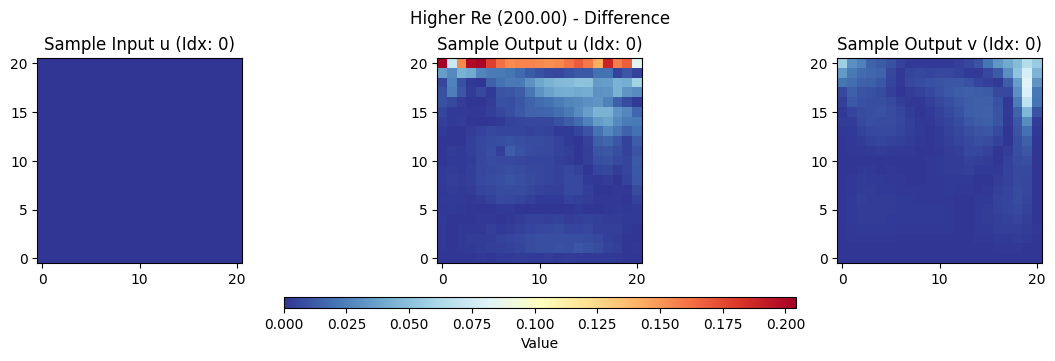

--------------------------------------------------


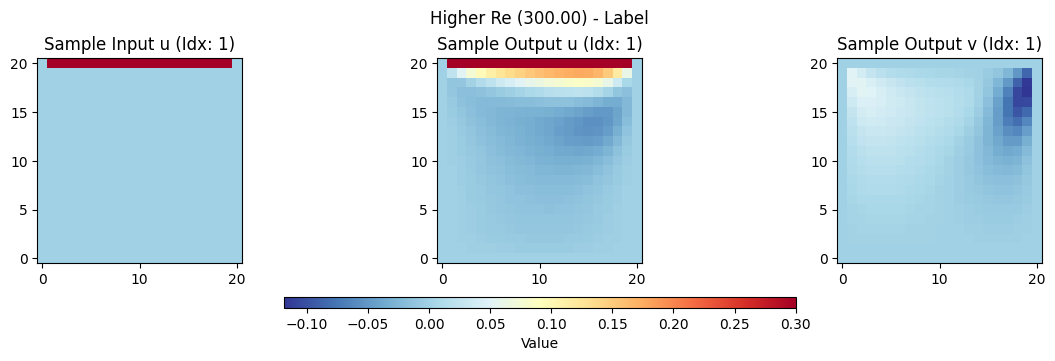

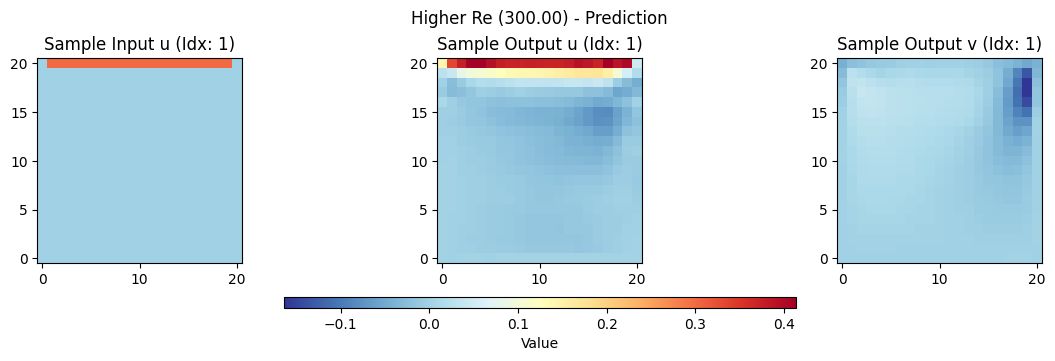

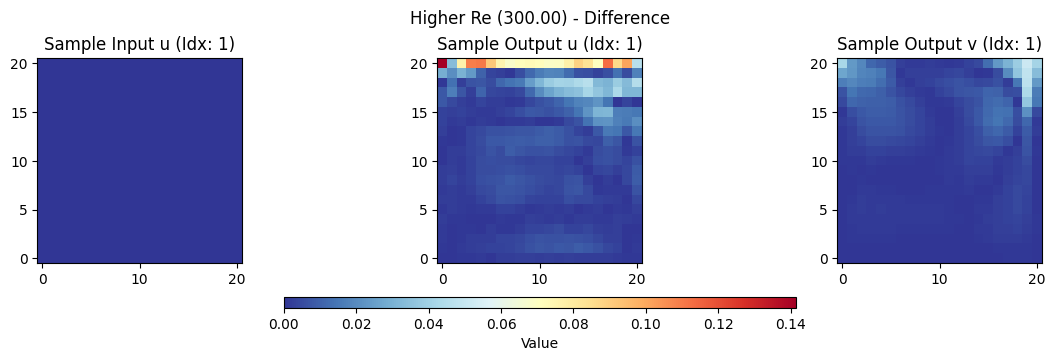

--------------------------------------------------


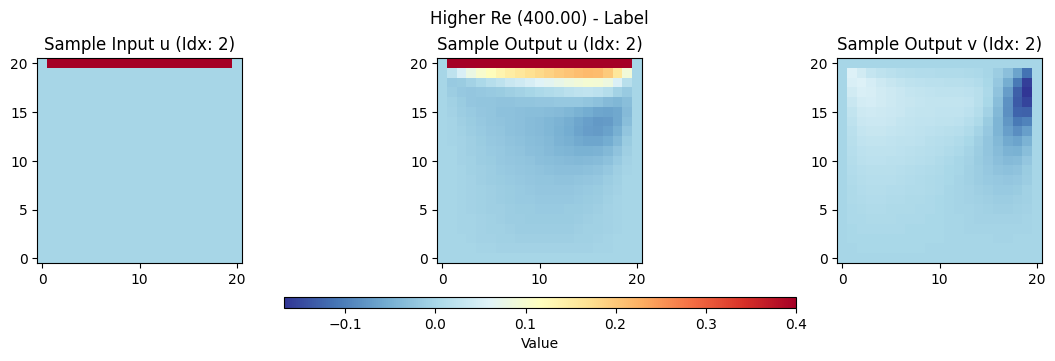

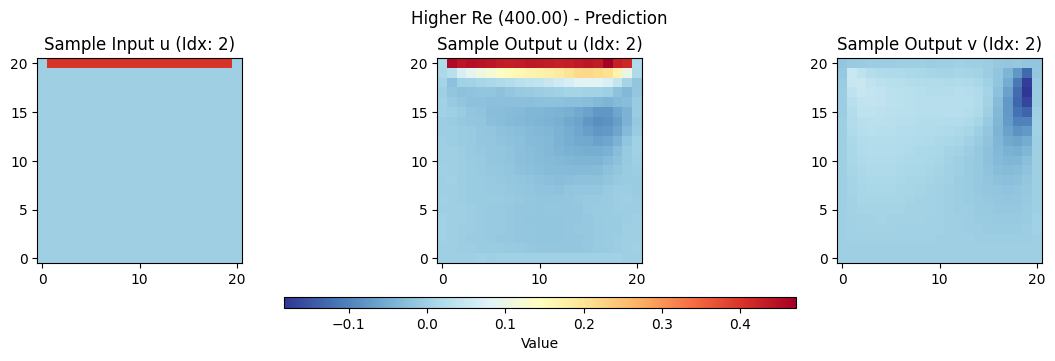

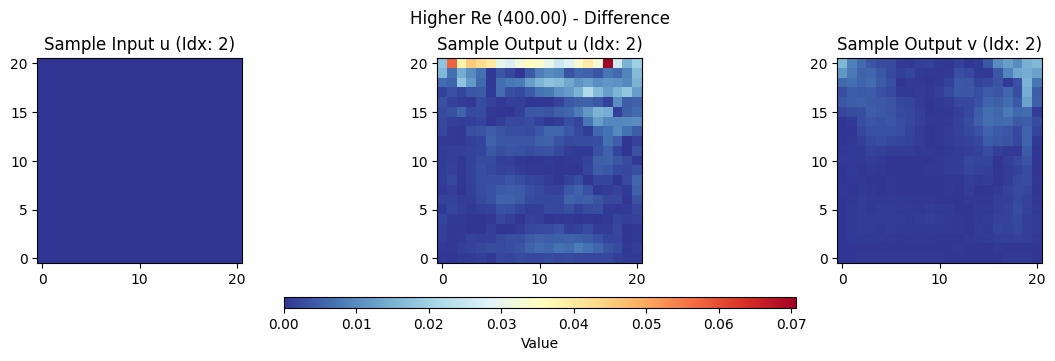

In [13]:
inputs, outputs, predictions = datasets["re_ood_low"].values()

for i in range(outputs.shape[0]):
    print("-" * 50)
    re = inputs[i].max() * 1000
    plot_data_samples(inputs, outputs, f"Higher Re ({re:.2f}) - Label", i)
    plot_data_samples(inputs, predictions, f"Higher Re ({re:.2f}) - Prediction", i)
    plot_data_samples(inputs - inputs, torch.abs(outputs - predictions), f"Higher Re ({re:.2f}) - Difference", i)

## Higher domain size

### Higher domain size (31x31)

--------------------------------------------------


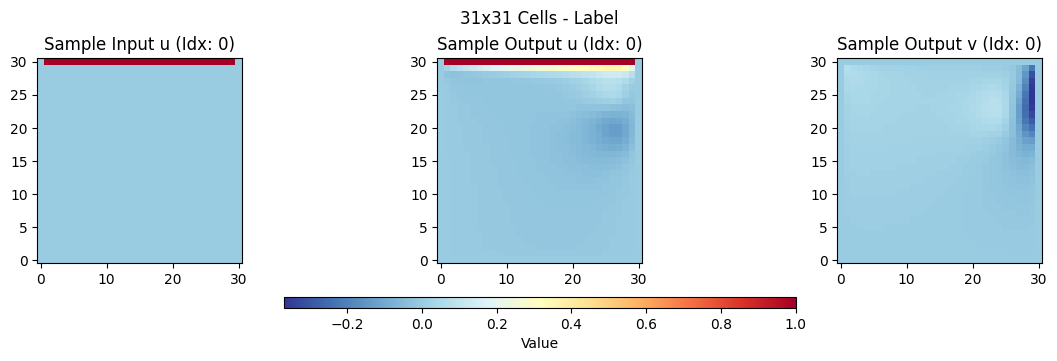

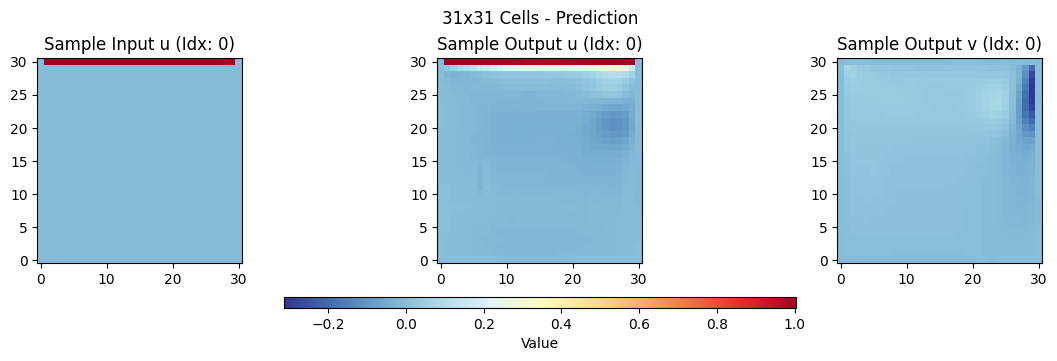

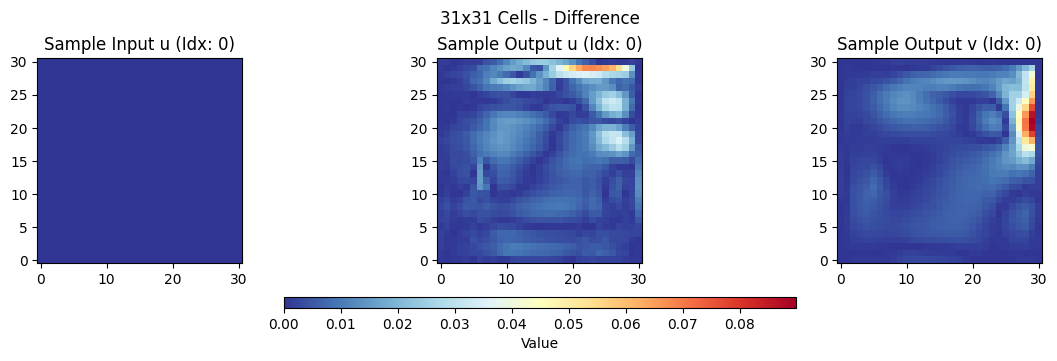

In [ ]:
inputs, outputs, predictions = datasets["ncells_ood_31"].values()

for i in range(outputs.shape[0]):
    print("-" * 50)
    re = inputs[i].max() * 1000
    plot_data_samples(inputs, outputs, "31x31 Cells - Label", i)
    plot_data_samples(inputs, predictions, "31x31 Cells - Prediction", i)
    plot_data_samples(inputs - inputs, torch.abs(outputs - predictions), "31x31 Cells - Absolute Difference", i)
    plot_data_samples(inputs - inputs, outputs - predictions, "31x31 Cells - Difference", i)

### Higher domain size (41x41)

--------------------------------------------------


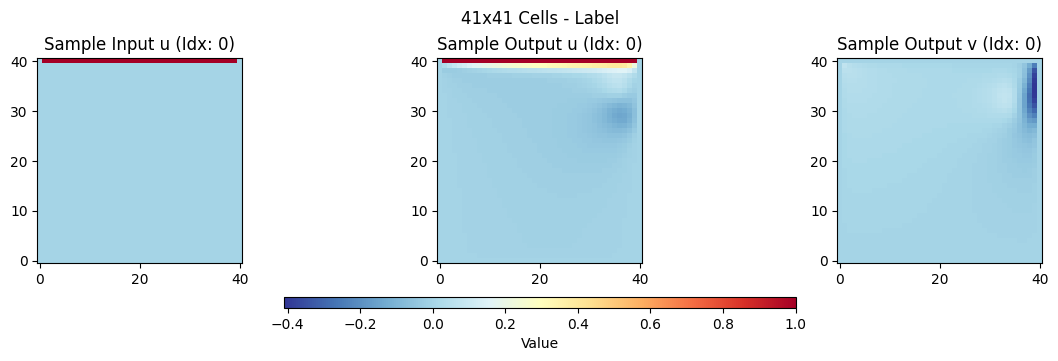

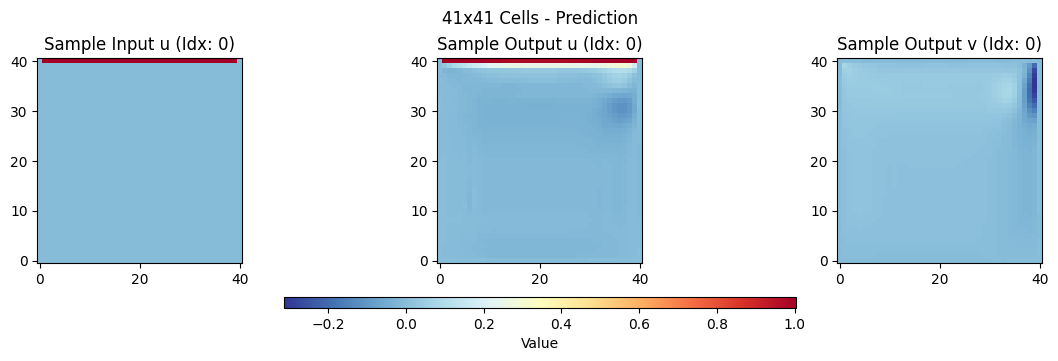

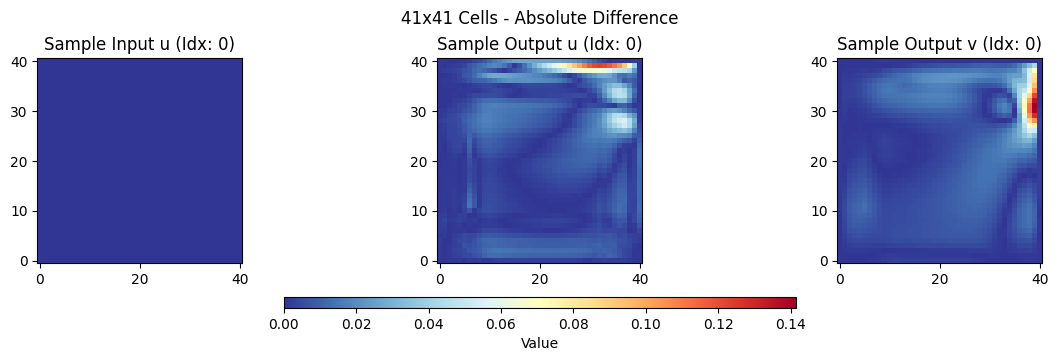

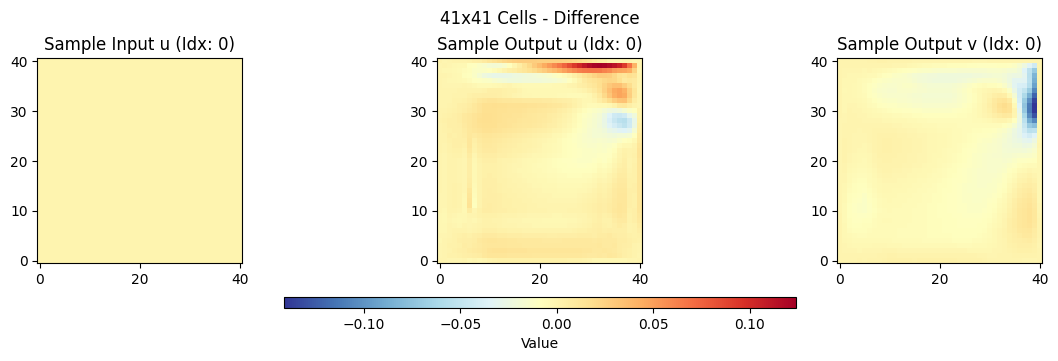

In [17]:
inputs, outputs, predictions = datasets["ncells_ood_41"].values()

for i in range(outputs.shape[0]):
    print("-" * 50)
    re = inputs[i].max() * 1000
    plot_data_samples(inputs, outputs, "41x41 Cells - Label", i)
    plot_data_samples(inputs, predictions, "41x41 Cells - Prediction", i)
    plot_data_samples(inputs - inputs, torch.abs(outputs - predictions), "41x41 Cells - Absolute Difference", i)
    plot_data_samples(inputs - inputs, outputs - predictions, "41x41 Cells - Difference", i)


## Passing-by-velocity at alternative wall

### Bottom wall

--------------------------------------------------


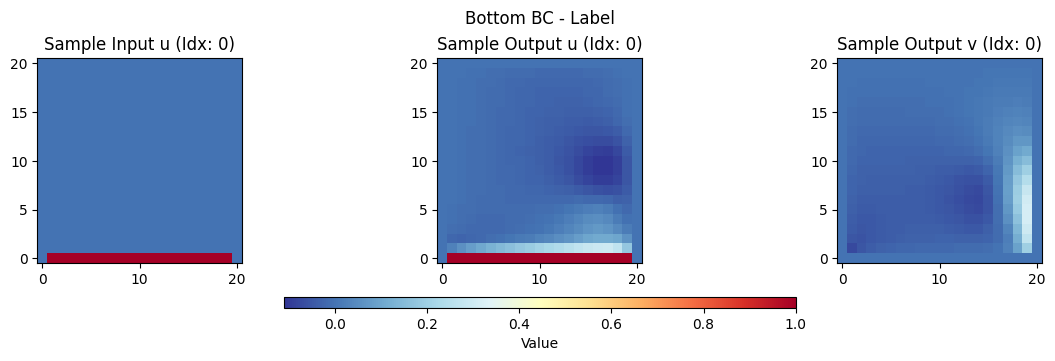

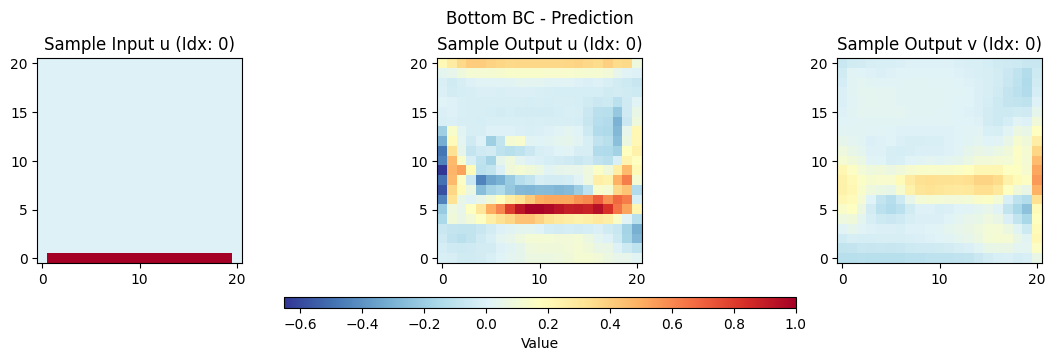

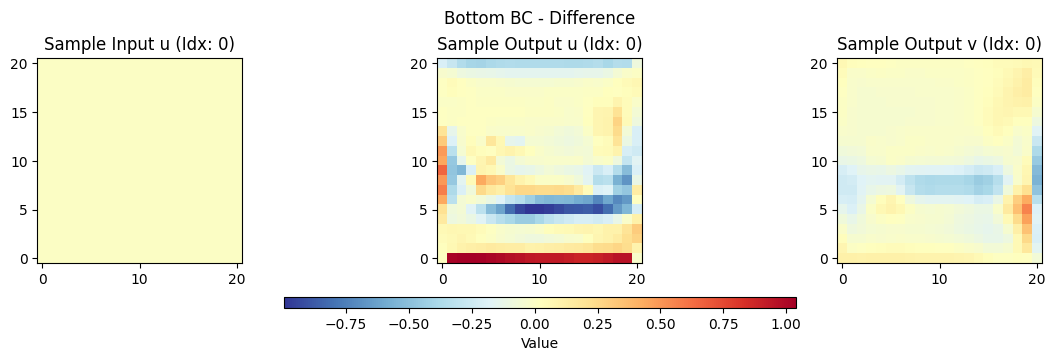

In [11]:
inputs, outputs, predictions = datasets["bc_ood_bottom"].values()

for i in range(outputs.shape[0]):
    print("-" * 50)
    re = inputs[i].max() * 1000
    plot_data_samples(inputs, outputs, "Bottom BC - Label", i)
    plot_data_samples(inputs, predictions, "Bottom BC - Prediction", i)
    plot_data_samples(inputs - inputs, outputs - predictions, "Bottom BC - Difference", i)

### Left wall

--------------------------------------------------


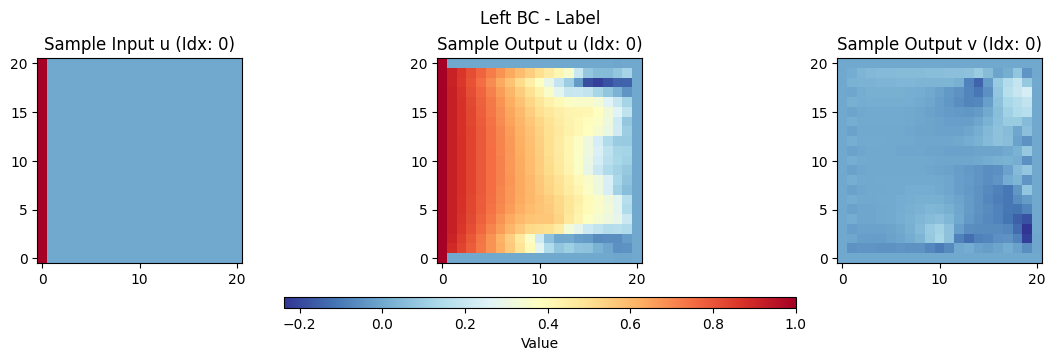

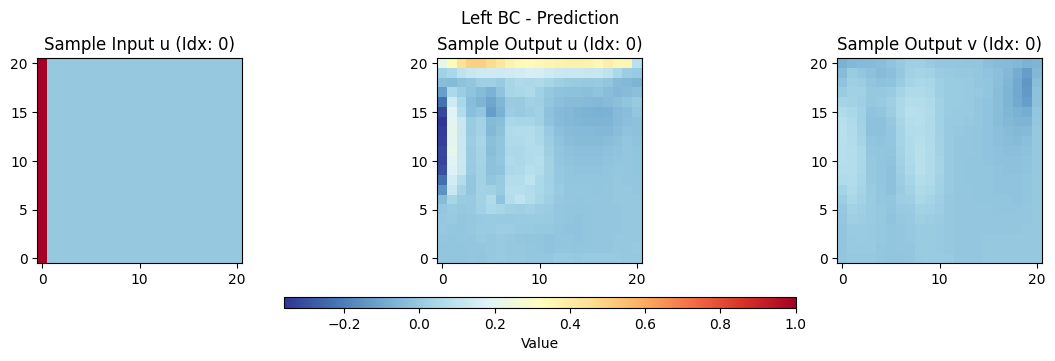

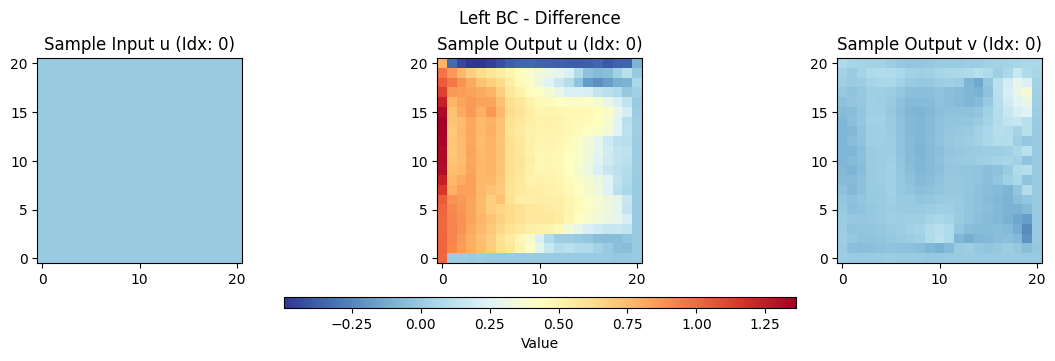

In [12]:
inputs, outputs, predictions = datasets["bc_ood_left"].values()

for i in range(outputs.shape[0]):
    print("-" * 50)
    re = inputs[i].max() * 1000
    plot_data_samples(inputs, outputs, "Left BC - Label", i)
    plot_data_samples(inputs, predictions, "Left BC - Prediction", i)
    plot_data_samples(inputs - inputs, outputs - predictions, "Left BC - Difference", i)